In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
%matplotlib inline
%cd /content/gdrive/My Drive/Colab Notebooks
# %mkdir DL_project
%cd DL_project
# %mkdir dataset
%ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks
/content/gdrive/My Drive/Colab Notebooks/DL_project
byte_net.pth             close_msft.jpg             modules.py
close_aaplattention.pth  close_nasdaqattention.pth  multi_head_attention.py
close_aapl.jpg           close_nvdattention.pth     plots/
close_amznattention.pth  close_nvd.jpg              prediction-attention.pkl
close_amzn.jpg           close_spattention.pth      __pycache__/
close_cscoattention.pth  close

In [0]:
# !cp ../../../../*.py .

In [0]:
!ls

byte_net.pth		 close_msft.jpg		    modules.py
close_aaplattention.pth  close_nasdaqattention.pth  multi_head_attention.py
close_aapl.jpg		 close_nvdattention.pth     plots
close_amznattention.pth  close_nvd.jpg		    prediction-attention.pkl
close_amzn.jpg		 close_spattention.pth	    __pycache__
close_cscoattention.pth  close_sp.jpg		    utils2.py
close_csco.jpg		 close_yndxattention.pth    utils.py
close_djiattention.pth	 close_yndx.jpg		    vol_aapl.jpg
close_dji.jpg		 constants.py		    vol_amzn.jpg
close_ebayattention.pth  custom_types.py	    vol_csco.jpg
close_ebay.jpg		 data			    vol_dji.jpg
close_fbattention.pth	 dataset		    vol_ebay.jpg
close_fb.jpg		 GOOG-year.csv		    vol_fb.jpg
close_googattention.pth  jpeg			    vol_goog.jpg
close_goog.jpg		 kolyan_data_1.pkl	    vol_ibm.jpg
close_ibmattention.pth	 kolyan_data.pkl	    vol_intc.jpg
close_ibm.jpg		 main_predict.py	    vol_msft.jpg
close_intcattention.pth  main.py		    vol_nvd.jpg
close_intc.jpg		 models.py		    vol_sp.jpg
clo

In [0]:
# !cp ../../../../utils.py .

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch.nn.functional as F
from torch.autograd import Variable
import torch
from torch import nn
import models, modules, utils
import warnings
warnings.filterwarnings("ignore")

In [0]:
df = pd.read_pickle('./dataset/whole_dataset.pkl')
df.columns

Index(['1_bin', '2_bin', '3_bin', '4_bin', '5_bin', '6_bin', '7_bin', '8_bin',
       '9_bin', '10_bin', 'date', 'counts', 'close_aapl', 'vol_aapl',
       'close_goog', 'vol_goog', 'close_dji', 'vol_dji', 'close_msft',
       'vol_msft', 'close_yndx', 'vol_yndx', 'close_amzn', 'vol_amzn',
       'close_ebay', 'vol_ebay', 'close_ibm', 'vol_ibm', 'close_nvd',
       'vol_nvd', 'close_sp', 'vol_sp', 'close_csco', 'vol_csco', 'close_fb',
       'vol_fb', 'close_intc', 'vol_intc', 'close_nasdaq', 'vol_nasdaq'],
      dtype='object')

In [0]:
prediction_df = pd.read_pickle('prediction-attention.pkl')

In [0]:
columns = ['close_aapl', 'vol_aapl',
       'close_goog', 'vol_goog', 'close_dji', 'vol_dji', 'close_msft',
       'vol_msft', 'close_yndx', 'vol_yndx', 'close_amzn', 'vol_amzn',
       'close_ebay', 'vol_ebay', 'close_ibm', 'vol_ibm', 'close_nvd',
       'vol_nvd', 'close_sp', 'vol_sp', 'close_csco', 'vol_csco', 'close_fb',
       'vol_fb', 'close_intc', 'vol_intc', 'close_nasdaq', 'vol_nasdaq']


timestamp = 5
epoch = 200
future_day = 50
embedded_size = 128
learning_rate = 0.001

In [0]:
prediction_df = pd.read_pickle('prediction-attention.pkl')

In [0]:
prediction_df.shape

(563, 26)

In [0]:
prediction_df = pd.DataFrame()
for i in range(26, len(columns), 2):
    data = df[[columns[i], columns[i+1]]]
    date_ori = pd.to_datetime(df['date']).tolist()
    minmax = MinMaxScaler().fit(data.iloc[:].astype('float32'))
    df_log = minmax.transform(data.iloc[:].astype('float32'))
    df_log = pd.DataFrame(df_log)
    model = models.attention(embedded_size, embedded_size, data.shape[1], data.shape[1])
    utils.train(model, df_log.iloc[:530], epoch = 1000)
    model.save(path = columns[i] + 'attention.pth')
    pr, tm =utils.predict(model, df_log[:530], date_ori[:530], future_day =33)
    pr = minmax.inverse_transform(pr)
    prediction_df[columns[i]] = pr[:, 0]
    prediction_df[columns[i+1]] = pr[:, 1]
    prediction_df.to_pickle('prediction-attention.pkl')
    print(columns[i])

 10%|█         | 100/1000 [03:06<32:36,  2.17s/it]

epoch: 100 avg loss: 0.0033674536


 20%|██        | 200/1000 [07:12<35:27,  2.66s/it]

epoch: 200 avg loss: 0.003374443


 30%|███       | 300/1000 [11:47<33:09,  2.84s/it]

epoch: 300 avg loss: 0.002912943


 40%|████      | 400/1000 [16:36<29:02,  2.90s/it]

epoch: 400 avg loss: 0.0027478049


 50%|█████     | 500/1000 [21:31<24:58,  3.00s/it]

epoch: 500 avg loss: 0.0020280564


 60%|██████    | 600/1000 [26:42<20:57,  3.14s/it]

epoch: 600 avg loss: 0.0014841689


 70%|███████   | 700/1000 [32:02<16:22,  3.27s/it]

epoch: 700 avg loss: 0.00095745135


 80%|████████  | 800/1000 [37:39<11:26,  3.43s/it]

epoch: 800 avg loss: 0.0005744255


 90%|█████████ | 900/1000 [43:28<05:55,  3.55s/it]

epoch: 900 avg loss: 0.0004347922


100%|██████████| 1000/1000 [49:25<00:00,  3.61s/it]

epoch: 1000 avg loss: 0.0003514132


close_nasdaq


In [0]:
data = pd.read_pickle('kolyan_data_1.pkl')
# data[prediction_df.columns] = prediction_df


In [0]:
!cp ../../../../kolyan_data_1.pkl .

In [0]:
data.shape

(563, 38)

In [0]:
prediction_df[columns[-2]] = pr[:, 0]
prediction_df[columns[-1]] = pr[:, 1]

In [0]:
for col in columns:
    if col not in prediction_df.columns:
        prediction_df[col] = data[col]

In [0]:
data = df.drop(columns=['date'])
date_ori = pd.to_datetime(df['date']).tolist()

In [0]:
prediction_df['date'] = df['date']

In [0]:
prediction_df

,close_nasdaq,vol_nasdaq
0,4903.089844,2.218420e+09
1,4735.167936,2.063192e+09
2,4684.265431,2.196461e+09
3,4543.286189,2.612446e+09
4,4536.066859,2.400302e+09
5,4517.554900,2.406558e+09
6,4493.095258,2.265710e+09
7,4387.506129,2.530393e+09
8,4416.353505,2.648384e+09
9,4320.422135,2.822246e+09


Text(0.5, 0, 'Value')

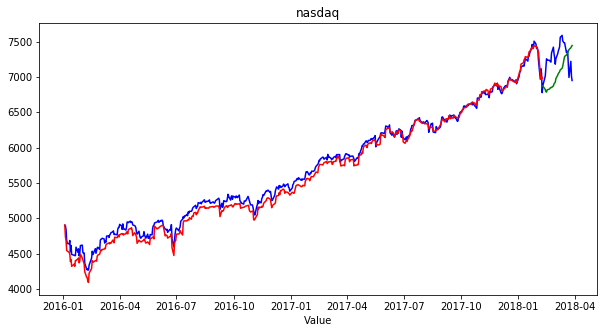

In [0]:
plt.figure(figsize=(10, 5))
plt.title('nasdaq')
plt.plot(df['date'], df['close_nasdaq'], c = 'b')
plt.plot(df['date'][:530], prediction_df['close_nasdaq'][:530], c = 'r')
plt.plot(df['date'][530:], prediction_df['close_nasdaq'][530:], c = 'g')
plt.xlabel('Date')
plt.xlabel('Value')

In [0]:
prediction_df.to_pickle('prediction-attention.pkl')

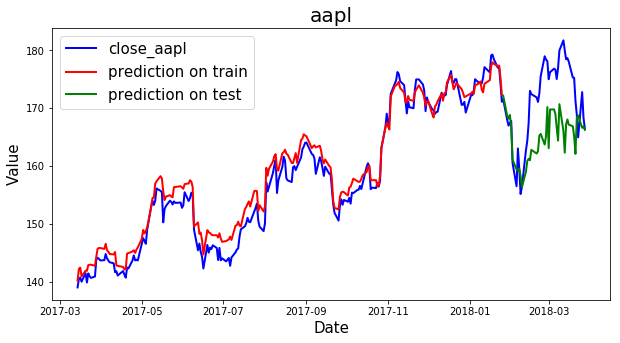

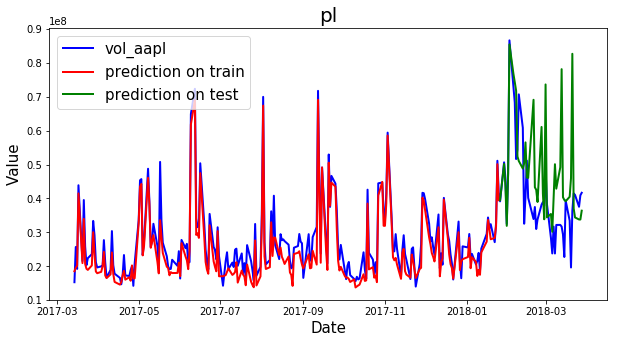

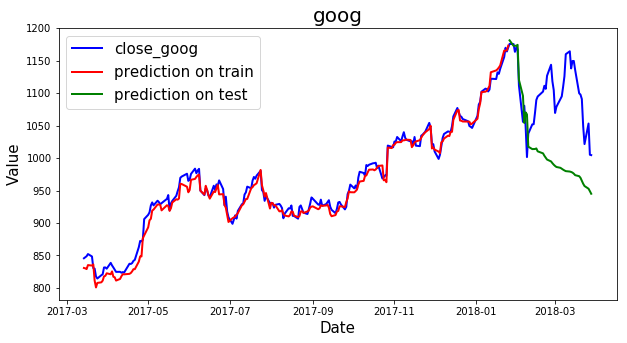

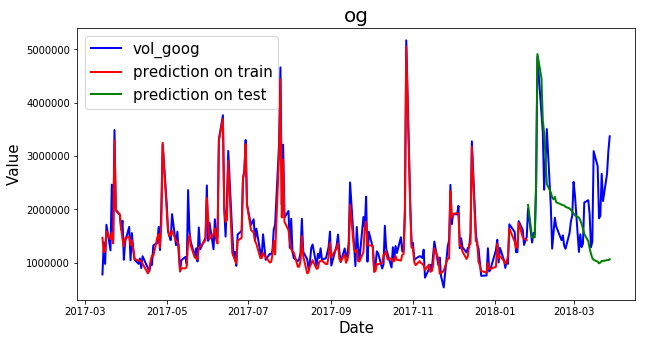

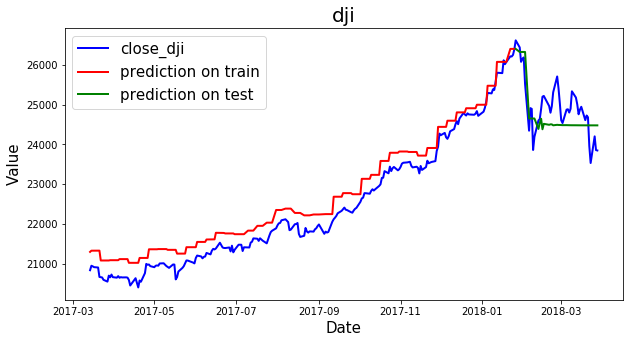

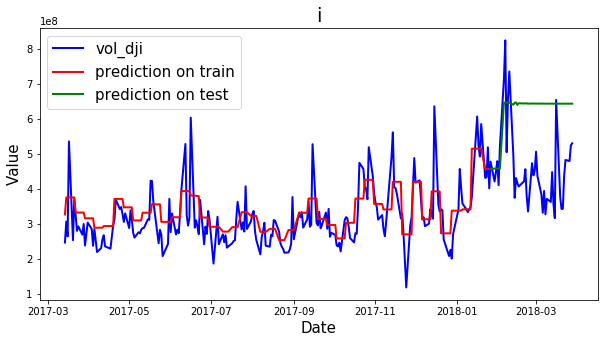

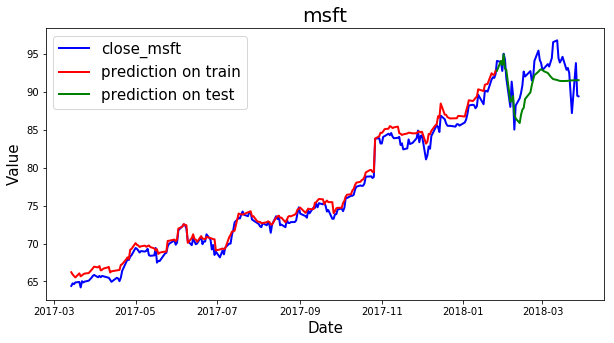

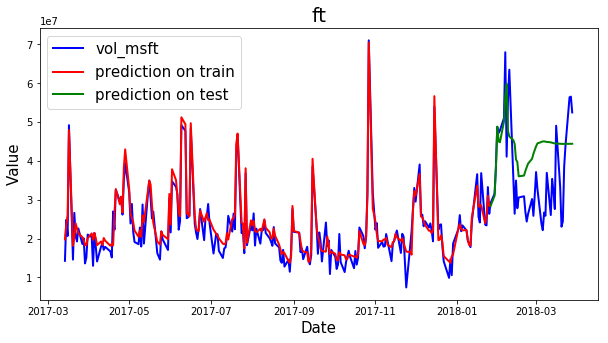

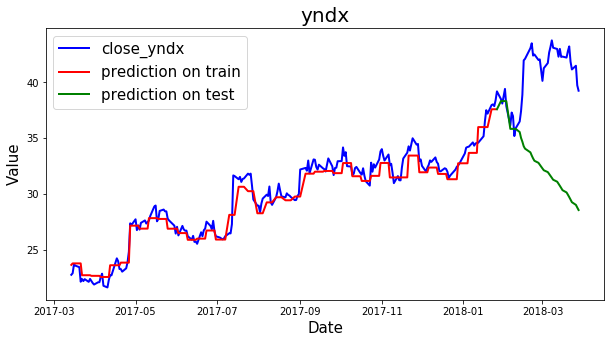

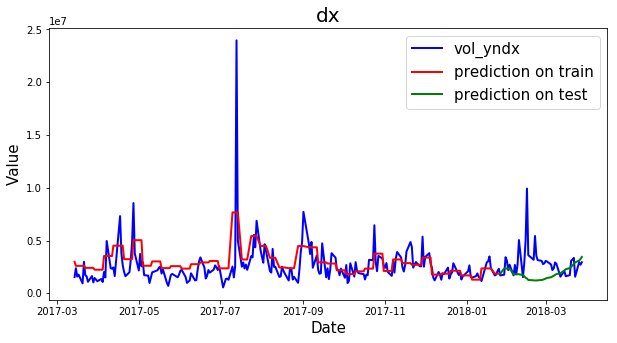

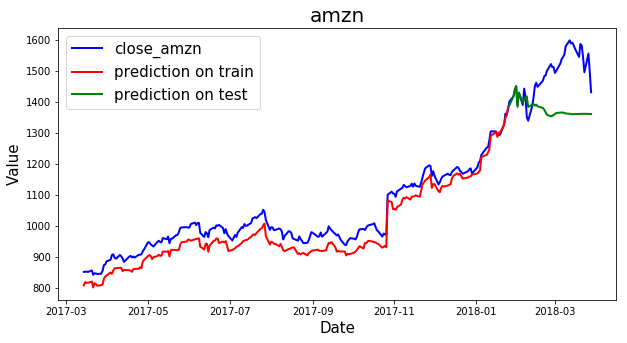

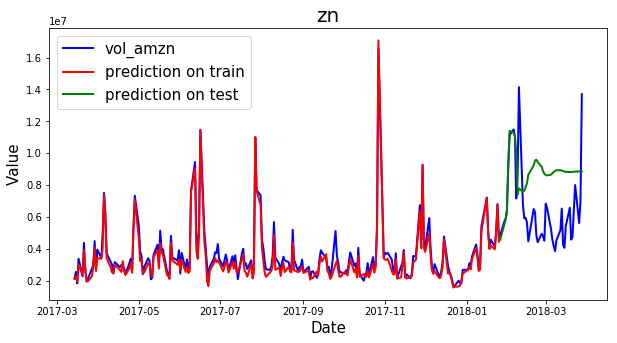

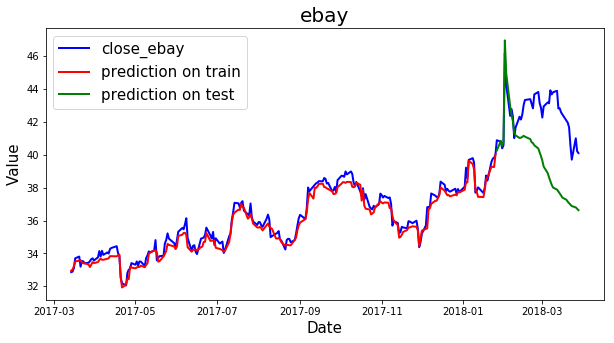

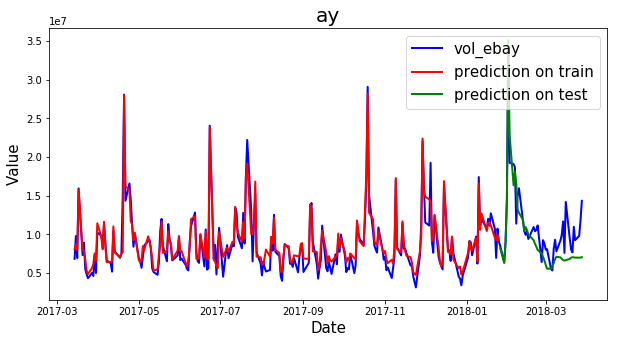

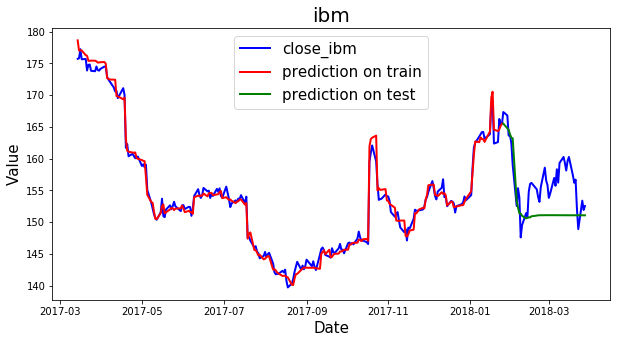

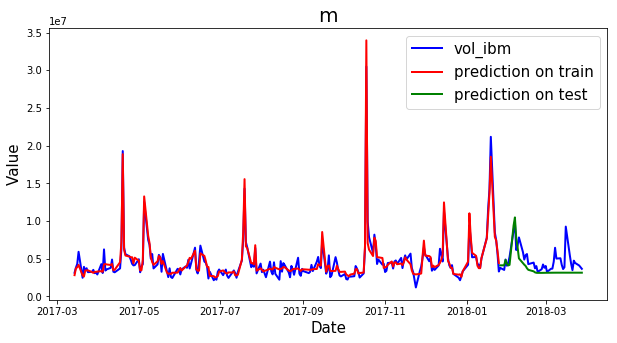

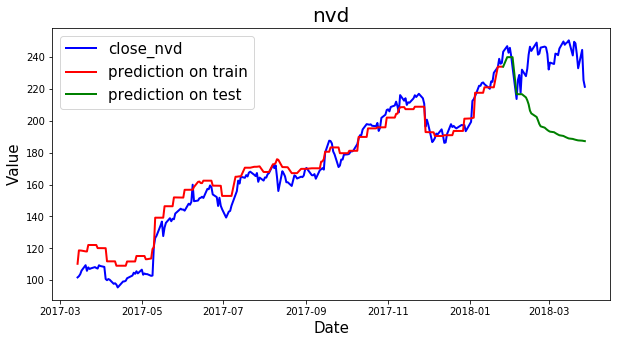

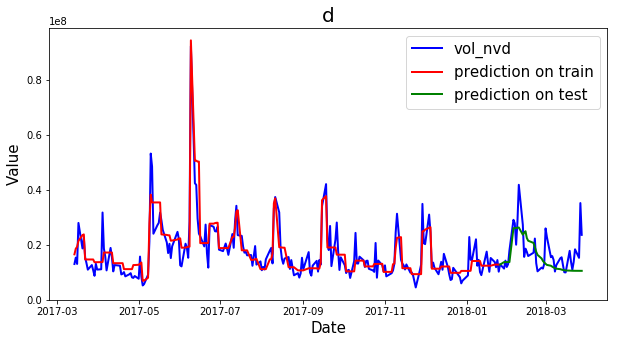

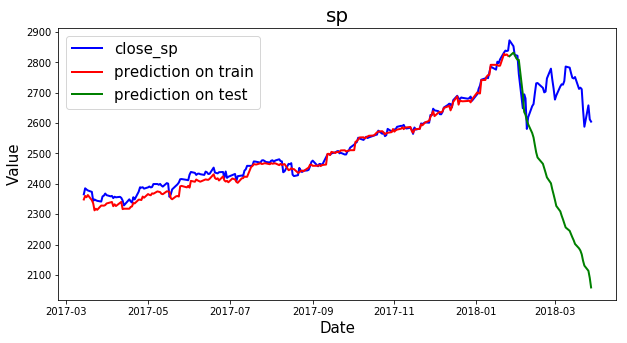

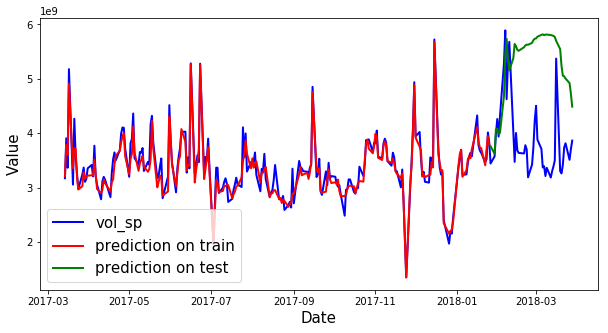

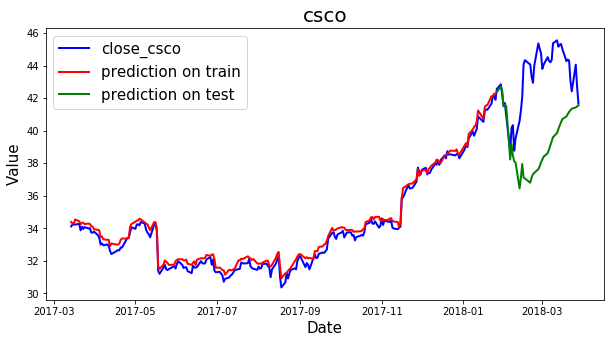

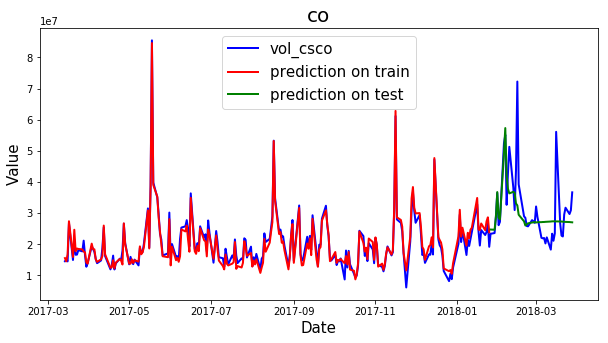

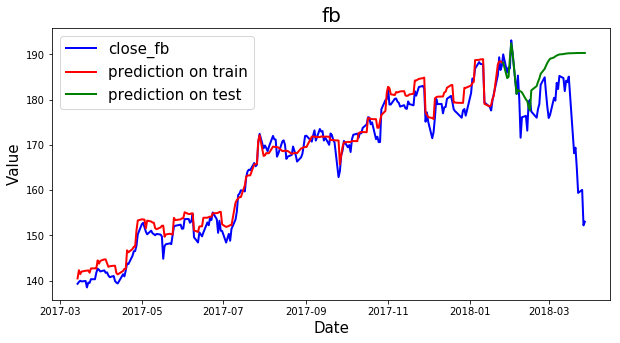

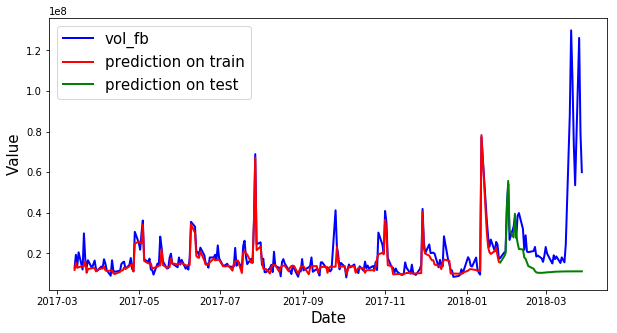

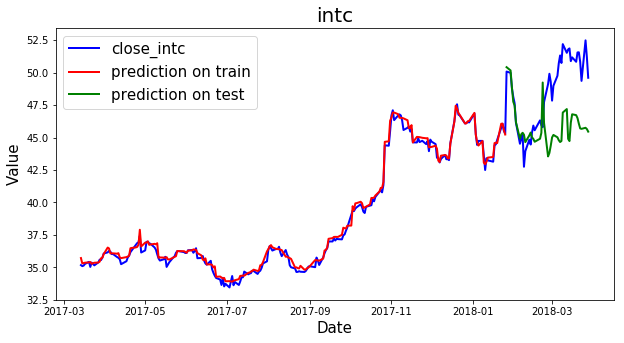

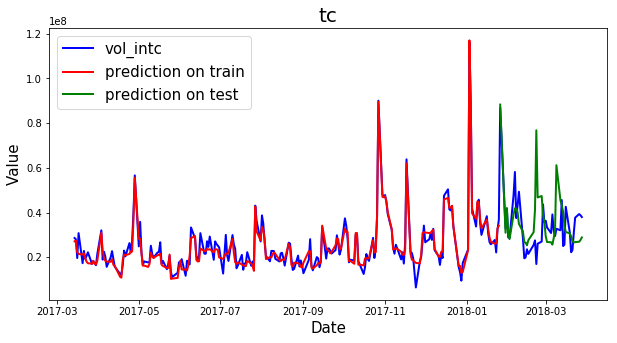

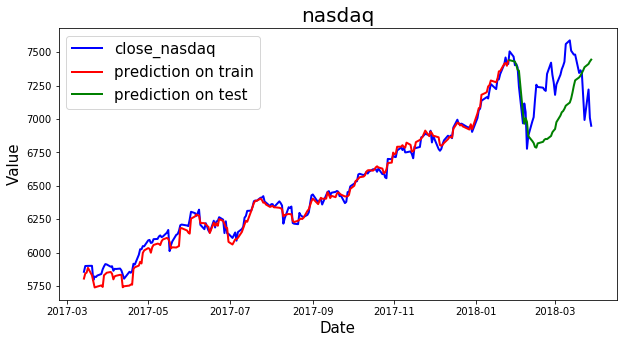

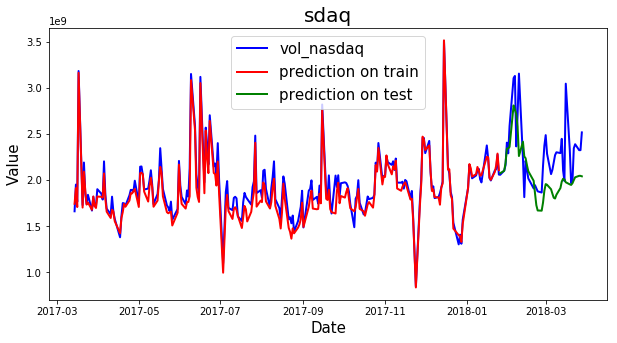

In [0]:
for i in range(0, len(columns)):
    plt.figure(figsize=(10, 5))
    plt.title(columns[i][6:], fontsize = 20)
    plt.plot(df['date'][300:], df[columns[i]][300:], c = 'b', linewidth = 2)
    plt.plot(df['date'][300:520], prediction_df[columns[i]][300:520], c = 'r', label = 'prediction on train', linewidth = 2)
    plt.plot(df['date'][520:], prediction_df[columns[i]][520:], c = 'g', label = 'prediction on test', linewidth = 2)
    plt.xlabel('Date', fontsize = 15)
    plt.ylabel('Value', fontsize = 15)
    plt.legend(fontsize = 15)
    plt.savefig('./jpeg/' + columns[i] + '.jpg')

In [0]:
df

,1_bin,2_bin,3_bin,4_bin,5_bin,6_bin,7_bin,8_bin,9_bin,10_bin,date,counts,close_aapl,vol_aapl,close_goog,vol_goog,close_dji,vol_dji,close_msft,vol_msft,close_yndx,vol_yndx,close_amzn,vol_amzn,close_ebay,vol_ebay,close_ibm,vol_ibm,close_nvd,vol_nvd,close_sp,vol_sp,close_csco,vol_csco,close_fb,vol_fb,close_intc,vol_intc,close_nasdaq,vol_nasdaq
0,17.0,3.0,2.0,0.0,3.0,99.0,1.0,2.0,14.0,70.0,2016-01-04,211,105.349998,67649400,741.840027,3272800,17148.939453,148060000,54.799999,53778000,15.220000,3641800,636.989990,9314500,26.430000,19107600,135.949997,5229400,32.369999,8951900,2012.660034,4304880000,26.410000,35827100,102.220001,37912400,33.990002,27882200,4903.089844,2218420000
1,19.0,2.0,1.0,1.0,5.0,105.0,2.0,0.0,17.0,85.0,2016-01-05,237,102.709999,55791000,742.580017,1950700,17158.660156,105750000,55.049999,34079700,15.410000,2422300,633.789978,5822600,26.120001,16691400,135.850006,3924800,32.889999,12256800,2016.709961,3706620000,26.290001,22024900,102.730003,23258200,33.830002,16709500,4891.430176,1927380000
2,18.0,2.0,1.0,0.0,3.0,114.0,2.0,2.0,21.0,73.0,2016-01-06,236,100.699997,68457400,743.619995,1947000,16906.509766,120250000,54.049999,39518900,14.970000,4089500,632.650024,5329200,26.410000,12139900,135.169998,4310900,31.530001,11233600,1990.260010,4336660000,26.010000,30799800,102.970001,25096200,33.080002,25491300,4835.759766,2168620000
3,12.0,4.0,0.0,0.0,1.0,108.0,1.0,2.0,12.0,61.0,2016-01-07,201,96.449997,81094400,726.390015,2963700,16514.099609,176240000,52.169998,56564900,13.960000,3417600,607.940002,7074900,25.690001,13350000,132.860001,7025800,30.280001,16132600,1943.089966,5076590000,25.410000,43235400,97.919998,45172900,31.840000,37680500,4689.430176,2552590000
4,12.0,7.0,2.0,0.0,1.0,124.0,0.0,4.0,26.0,72.0,2016-01-08,248,96.959999,70798000,714.469971,2450900,16346.450195,141850000,52.330002,48754000,13.420000,2691300,607.049988,5512900,25.750000,11233800,131.630005,4762700,29.629999,9961800,1922.030029,4664940000,24.780001,28609700,97.330002,35402300,31.510000,29953800,4643.629883,2288750000
5,16.0,4.0,1.0,0.0,1.0,107.0,2.0,2.0,25.0,74.0,2016-01-11,232,98.529999,49739400,716.030029,2089300,16398.570313,127790000,52.299999,36663600,12.860000,3908100,617.739990,4869200,26.100000,11938800,133.229996,4967000,29.680000,10234300,1923.670044,4607290000,25.270000,32224100,97.510002,29932400,32.060001,27594200,4637.990234,2391110000
6,16.0,2.0,3.0,1.0,5.0,117.0,2.0,0.0,17.0,85.0,2016-01-12,248,99.959999,49154200,726.070007,2024500,16516.220703,117480000,52.779999,36095500,13.090000,2423200,617.890015,4724100,26.209999,9444200,132.899994,5078700,30.180000,11733900,1938.680054,4887260000,25.350000,30122400,99.370003,28395400,32.680000,28587700,4685.919922,2147470000
7,12.0,2.0,4.0,0.0,0.0,111.0,2.0,4.0,9.0,104.0,2016-01-13,248,97.389999,62439600,700.559998,2501700,16151.410156,153530000,51.639999,66883600,12.980000,2277700,581.809998,7655200,25.410000,11659900,131.169998,4700100,29.260000,12041800,1890.280029,5087030000,24.600000,33431600,95.440002,33410600,31.910000,34445700,4526.060059,2533200000
8,13.0,1.0,0.0,1.0,2.0,114.0,3.0,2.0,22.0,68.0,2016-01-14,226,99.519997,63170100,714.719971,2225800,16379.049805,158830000,53.110001,52381900,13.180000,2080500,593.000000,7238000,25.860001,16551100,132.910004,5709600,28.670000,15005900,1921.839966,5241110000,24.660000,42902400,98.370003,48658600,32.740002,48728200,4615.000000,2565560000
9,14.0,2.0,0.0,1.0,3.0,122.0,0.0,3.0,16.0,97.0,2016-01-15,258,97.129997,79010000,694.450012,3608100,15988.080078,239210000,50.990002,71820700,12.220000,3542300,570.179993,7784500,25.260000,14332700,130.029999,9008500,27.110001,21036300,1880.329956,5468460000,23.620001,64092800,94.970001,45935600,29.760000,76373900,4488.419922,2818630000


In [0]:
prediction_df['close_nasdaq'] = df['close_nasdaq']


In [0]:
df

,1_bin,2_bin,3_bin,4_bin,5_bin,6_bin,7_bin,8_bin,9_bin,10_bin,date,counts,close_aapl,vol_aapl,close_goog,vol_goog,close_dji,vol_dji,close_msft,vol_msft,close_yndx,vol_yndx,close_amzn,vol_amzn,close_ebay,vol_ebay,close_ibm,vol_ibm,close_nvd,vol_nvd,close_sp,vol_sp,close_csco,vol_csco,close_fb,vol_fb,close_intc,vol_intc,close_nasdaq,vol_nasdaq
0,17.0,3.0,2.0,0.0,3.0,99.0,1.0,2.0,14.0,70.0,2016-01-04,211,105.349998,67649400,741.840027,3272800,17148.939453,148060000,54.799999,53778000,15.220000,3641800,636.989990,9314500,26.430000,19107600,135.949997,5229400,32.369999,8951900,2012.660034,4304880000,26.410000,35827100,102.220001,37912400,33.990002,27882200,4903.089844,2218420000
1,19.0,2.0,1.0,1.0,5.0,105.0,2.0,0.0,17.0,85.0,2016-01-05,237,102.709999,55791000,742.580017,1950700,17158.660156,105750000,55.049999,34079700,15.410000,2422300,633.789978,5822600,26.120001,16691400,135.850006,3924800,32.889999,12256800,2016.709961,3706620000,26.290001,22024900,102.730003,23258200,33.830002,16709500,4891.430176,1927380000
2,18.0,2.0,1.0,0.0,3.0,114.0,2.0,2.0,21.0,73.0,2016-01-06,236,100.699997,68457400,743.619995,1947000,16906.509766,120250000,54.049999,39518900,14.970000,4089500,632.650024,5329200,26.410000,12139900,135.169998,4310900,31.530001,11233600,1990.260010,4336660000,26.010000,30799800,102.970001,25096200,33.080002,25491300,4835.759766,2168620000
3,12.0,4.0,0.0,0.0,1.0,108.0,1.0,2.0,12.0,61.0,2016-01-07,201,96.449997,81094400,726.390015,2963700,16514.099609,176240000,52.169998,56564900,13.960000,3417600,607.940002,7074900,25.690001,13350000,132.860001,7025800,30.280001,16132600,1943.089966,5076590000,25.410000,43235400,97.919998,45172900,31.840000,37680500,4689.430176,2552590000
4,12.0,7.0,2.0,0.0,1.0,124.0,0.0,4.0,26.0,72.0,2016-01-08,248,96.959999,70798000,714.469971,2450900,16346.450195,141850000,52.330002,48754000,13.420000,2691300,607.049988,5512900,25.750000,11233800,131.630005,4762700,29.629999,9961800,1922.030029,4664940000,24.780001,28609700,97.330002,35402300,31.510000,29953800,4643.629883,2288750000
5,16.0,4.0,1.0,0.0,1.0,107.0,2.0,2.0,25.0,74.0,2016-01-11,232,98.529999,49739400,716.030029,2089300,16398.570313,127790000,52.299999,36663600,12.860000,3908100,617.739990,4869200,26.100000,11938800,133.229996,4967000,29.680000,10234300,1923.670044,4607290000,25.270000,32224100,97.510002,29932400,32.060001,27594200,4637.990234,2391110000
6,16.0,2.0,3.0,1.0,5.0,117.0,2.0,0.0,17.0,85.0,2016-01-12,248,99.959999,49154200,726.070007,2024500,16516.220703,117480000,52.779999,36095500,13.090000,2423200,617.890015,4724100,26.209999,9444200,132.899994,5078700,30.180000,11733900,1938.680054,4887260000,25.350000,30122400,99.370003,28395400,32.680000,28587700,4685.919922,2147470000
7,12.0,2.0,4.0,0.0,0.0,111.0,2.0,4.0,9.0,104.0,2016-01-13,248,97.389999,62439600,700.559998,2501700,16151.410156,153530000,51.639999,66883600,12.980000,2277700,581.809998,7655200,25.410000,11659900,131.169998,4700100,29.260000,12041800,1890.280029,5087030000,24.600000,33431600,95.440002,33410600,31.910000,34445700,4526.060059,2533200000
8,13.0,1.0,0.0,1.0,2.0,114.0,3.0,2.0,22.0,68.0,2016-01-14,226,99.519997,63170100,714.719971,2225800,16379.049805,158830000,53.110001,52381900,13.180000,2080500,593.000000,7238000,25.860001,16551100,132.910004,5709600,28.670000,15005900,1921.839966,5241110000,24.660000,42902400,98.370003,48658600,32.740002,48728200,4615.000000,2565560000
9,14.0,2.0,0.0,1.0,3.0,122.0,0.0,3.0,16.0,97.0,2016-01-15,258,97.129997,79010000,694.450012,3608100,15988.080078,239210000,50.990002,71820700,12.220000,3542300,570.179993,7784500,25.260000,14332700,130.029999,9008500,27.110001,21036300,1880.329956,5468460000,23.620001,64092800,94.970001,45935600,29.760000,76373900,4488.419922,2818630000


In [0]:
for col in df.columns:
    if col not in prediction_df.columns:
        prediction_df[col] = df[col]

In [0]:
prediction_df = prediction_df.drop(columns= ['vol_nasdaq'])

In [0]:
X = prediction_df.drop(columns=['close_nasdaq', 'vol_nasdaq'])
y = prediction_df['close_nasdaq']

In [0]:
import typing
from typing import Tuple
import json
import os

import torch
from torch import nn
from torch import optim
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import utils
from modules import Encoder, Decoder
from custom_types import DaRnnNet, TrainData, TrainConfig
from utils import numpy_to_tvar
from constants import device


In [0]:
prediction_df

,close_nasdaq,close_aapl,vol_aapl,close_goog,vol_goog,close_dji,vol_dji,close_msft,vol_msft,close_yndx,vol_yndx,close_amzn,vol_amzn,close_ebay,vol_ebay,close_ibm,vol_ibm,close_nvd,vol_nvd,close_sp,vol_sp,close_csco,vol_csco,close_fb,vol_fb,close_intc,vol_intc,1_bin,2_bin,3_bin,4_bin,5_bin,6_bin,7_bin,8_bin,9_bin,10_bin,date,counts
0,4903.089844,105.349998,6.764940e+07,741.840027,3.272800e+06,17148.939453,1.480600e+08,54.799999,5.377800e+07,15.220000,3.641800e+06,636.989990,9.314500e+06,26.430000,1.910760e+07,135.949997,5.229400e+06,32.369999,8.951900e+06,2012.660034,4.304880e+09,26.410000,3.582710e+07,102.220001,3.791240e+07,33.990002,2.788220e+07,17.0,3.0,2.0,0.0,3.0,99.0,1.0,2.0,14.0,70.0,2016-01-04,211
1,4735.167936,102.538105,5.772677e+07,735.482999,1.718512e+06,16467.083670,1.314133e+08,54.016831,3.546355e+07,14.576974,3.568957e+06,579.500136,5.241124e+06,26.870500,1.514817e+07,133.097492,4.223682e+06,31.767441,1.283888e+07,1954.759863,3.829978e+09,26.331823,2.352280e+07,103.471135,2.464707e+07,33.351515,2.121501e+07,19.0,2.0,1.0,1.0,5.0,105.0,2.0,0.0,17.0,85.0,2016-01-05,237
2,4684.265431,100.070229,6.902743e+07,731.312510,1.873980e+06,16467.068323,1.314141e+08,54.010909,3.749507e+07,14.576974,3.568957e+06,581.479097,5.161887e+06,26.859171,1.381180e+07,133.093504,4.491933e+06,31.644368,1.292325e+07,1952.990926,3.854479e+09,26.180580,3.271996e+07,103.242375,2.713952e+07,33.282915,2.160084e+07,18.0,2.0,1.0,0.0,3.0,114.0,2.0,2.0,21.0,73.0,2016-01-06,236
3,4543.286189,96.835042,8.058956e+07,720.258645,2.777371e+06,16467.028650,1.314164e+08,52.882291,5.656131e+07,14.576974,3.568957e+06,568.113937,6.190986e+06,26.823137,1.303532e+07,131.980638,5.978115e+06,31.161573,1.324775e+07,1941.660308,4.443083e+09,25.572486,4.418859e+07,101.581861,4.359882e+07,32.111502,3.610707e+07,12.0,4.0,0.0,0.0,1.0,108.0,1.0,2.0,12.0,61.0,2016-01-07,201
4,4536.066859,96.898863,7.164992e+07,713.974587,2.294873e+06,16466.981139,1.314193e+08,52.371407,4.570894e+07,14.576974,3.568957e+06,573.232445,4.876460e+06,26.766277,1.200621e+07,131.188621,5.143119e+06,30.610850,1.360512e+07,1935.533796,4.542717e+09,24.684179,2.977752e+07,99.106557,3.189500e+07,31.858024,3.027483e+07,12.0,7.0,2.0,0.0,1.0,124.0,0.0,4.0,26.0,72.0,2016-01-08,248
5,4517.554900,99.030771,4.967512e+07,708.491360,1.991063e+06,16466.983752,1.314192e+08,52.385068,3.571145e+07,14.576974,3.568957e+06,570.414350,4.707422e+06,26.708665,1.206350e+07,130.991189,5.081966e+06,30.548853,1.364714e+07,1932.032693,4.554251e+09,25.135461,3.163889e+07,99.018733,3.022384e+07,31.828184,2.495791e+07,16.0,4.0,1.0,0.0,1.0,107.0,2.0,2.0,25.0,74.0,2016-01-11,232
6,4493.095258,100.525494,4.883492e+07,724.193023,1.803648e+06,16163.935800,1.496121e+08,51.522808,3.459398e+07,13.506592,3.218152e+06,550.345667,4.604637e+06,26.304645,1.019287e+07,130.855615,4.406819e+06,29.764560,1.487391e+07,1871.658329,4.676201e+09,25.232071,3.135904e+07,101.340046,2.690627e+07,32.280857,2.992843e+07,16.0,2.0,3.0,1.0,5.0,117.0,2.0,0.0,17.0,85.0,2016-01-12,248
7,4387.506129,99.171802,6.176407e+07,700.152401,2.353290e+06,16163.935718,1.496121e+08,51.654645,5.863054e+07,13.506591,3.218152e+06,537.571596,7.417861e+06,26.421720,1.235697e+07,131.223332,4.720002e+06,29.682490,1.500552e+07,1868.246053,4.817793e+09,24.564343,3.469913e+07,100.975344,2.873243e+07,32.290760,3.112824e+07,12.0,2.0,4.0,0.0,0.0,111.0,2.0,4.0,9.0,104.0,2016-01-13,248
8,4416.353505,98.671454,6.245119e+07,706.856995,2.147539e+06,16163.935637,1.496122e+08,52.851881,5.797643e+07,13.506592,3.218152e+06,544.526736,6.365030e+06,26.940311,1.640326e+07,131.127527,6.022049e+06,30.050121,1.620675e+07,1865.512442,4.906149e+09,24.451905,4.325908e+07,99.066679,4.330561e+07,32.557437,4.771334e+07,13.0,1.0,0.0,1.0,2.0,114.0,3.0,2.0,22.0,68.0,2016-01-14,226
9,4320.422135,96.381188,7.793963e+07,693.310522,3.366006e+06,16163.935473,1.496122e+08,51.257368,7.208848e+07,13.506592,3.218153e+06,539.779622,7.287136e+06,26.938676,1.605037e+07,128.505857,9.285624e+06,30.245040,1.672997e+07,18

In [0]:

logger = utils.setup_log()
logger.info(f"Using computation device: {device}")


def preprocess_data(dat, col_names) -> Tuple[TrainData, StandardScaler]:
    scale = StandardScaler().fit(dat)
    proc_dat = scale.transform(dat)

    mask = np.ones(proc_dat.shape[1], dtype=bool)
    dat_cols = list(dat.columns)
    for col_name in col_names:
        mask[dat_cols.index(col_name)] = False

    feats = proc_dat[:, mask]
    targs = proc_dat[:, ~mask]

    return TrainData(feats, targs), scale


def da_rnn(train_data: TrainData, n_targs: int, encoder_hidden_size=64, decoder_hidden_size=64,
           T=10, learning_rate=0.01, batch_size=128):

    train_cfg = TrainConfig(T, int(train_data.feats.shape[0] * 0.7), batch_size, nn.MSELoss())
    logger.info(f"Training size: {train_cfg.train_size:d}.")

    enc_kwargs = {"input_size": train_data.feats.shape[1], "hidden_size": encoder_hidden_size, "T": T}
    encoder = Encoder(**enc_kwargs).to(device)
    with open(os.path.join("data", "enc_kwargs.json"), "w") as fi:
        json.dump(enc_kwargs, fi, indent=4)

    dec_kwargs = {"encoder_hidden_size": encoder_hidden_size,
                  "decoder_hidden_size": decoder_hidden_size, "T": T, "out_feats": n_targs}
    decoder = Decoder(**dec_kwargs).to(device)
    with open(os.path.join("data", "dec_kwargs.json"), "w") as fi:
        json.dump(dec_kwargs, fi, indent=4)

    encoder_optimizer = optim.Adam(
        params=[p for p in encoder.parameters() if p.requires_grad],
        lr=learning_rate)
    decoder_optimizer = optim.Adam(
        params=[p for p in decoder.parameters() if p.requires_grad],
        lr=learning_rate)
    da_rnn_net = DaRnnNet(encoder, decoder, encoder_optimizer, decoder_optimizer)

    return train_cfg, da_rnn_net


def train(net: DaRnnNet, train_data: TrainData, t_cfg: TrainConfig, n_epochs=10, save_plots=False):
    iter_per_epoch = int(np.ceil(t_cfg.train_size * 1. / t_cfg.batch_size))
    iter_losses = np.zeros(n_epochs * iter_per_epoch)
    epoch_losses = np.zeros(n_epochs)
    logger.info(f"Iterations per epoch: {t_cfg.train_size * 1. / t_cfg.batch_size:3.3f} ~ {iter_per_epoch:d}.")

    n_iter = 0

    for e_i in range(n_epochs):
        perm_idx = np.random.permutation(t_cfg.train_size - t_cfg.T)

        for t_i in range(0, t_cfg.train_size, t_cfg.batch_size):
            batch_idx = perm_idx[t_i:(t_i + t_cfg.batch_size)]
            feats, y_history, y_target = prep_train_data(batch_idx, t_cfg, train_data)

            loss = train_iteration(net, t_cfg.loss_func, feats, y_history, y_target)
            iter_losses[e_i * iter_per_epoch + t_i // t_cfg.batch_size] = loss
            # if (j / t_cfg.batch_size) % 50 == 0:
            #    self.logger.info("Epoch %d, Batch %d: loss = %3.3f.", i, j / t_cfg.batch_size, loss)
            n_iter += 1

            adjust_learning_rate(net, n_iter)

        epoch_losses[e_i] = np.mean(iter_losses[range(e_i * iter_per_epoch, (e_i + 1) * iter_per_epoch)])

        if e_i % 10 == 0:
            y_test_pred = predict(net, train_data,
                                  t_cfg.train_size, t_cfg.batch_size, t_cfg.T,
                                  on_train=False)
            # TODO: make this MSE and make it work for multiple inputs
            val_loss = y_test_pred - train_data.targs[t_cfg.train_size:]
            logger.info(f"Epoch {e_i:d}, train loss: {epoch_losses[e_i]:3.3f}, val loss: {np.mean(np.abs(val_loss))}.")
            y_train_pred = predict(net, train_data,
                                   t_cfg.train_size, t_cfg.batch_size, t_cfg.T,
                                   on_train=True)
            plt.figure()
            plt.plot(range(1, 1 + len(train_data.targs)), train_data.targs,
                     label="True")
            plt.plot(range(t_cfg.T, len(y_train_pred) + t_cfg.T), y_train_pred,
                     label='Predicted - Train')
            plt.plot(range(t_cfg.T + len(y_train_pred), len(train_data.targs) + 1), y_test_pred,
                     label='Predicted - Test')
            plt.legend(loc='upper left')
            utils.save_or_show_plot(f"pred_{e_i}.png", save_plots)

    return iter_losses, epoch_losses


def prep_train_data(batch_idx: np.ndarray, t_cfg: TrainConfig, train_data: TrainData):
    feats = np.zeros((len(batch_idx), t_cfg.T - 1, train_data.feats.shape[1]))
    y_history = np.zeros((len(batch_idx), t_cfg.T - 1, train_data.targs.shape[1]))
    y_target = train_data.targs[batch_idx + t_cfg.T]

    for b_i, b_idx in enumerate(batch_idx):
        b_slc = slice(b_idx, b_idx + t_cfg.T - 1)
        feats[b_i, :, :] = train_data.feats[b_slc, :]
        y_history[b_i, :] = train_data.targs[b_slc]

    return feats, y_history, y_target


def adjust_learning_rate(net: DaRnnNet, n_iter: int):
    # TODO: Where did this Learning Rate adjustment schedule come from?
    # Should be modified to use Cosine Annealing with warm restarts https://www.jeremyjordan.me/nn-learning-rate/
    if n_iter % 10000 == 0 and n_iter > 0:
        for enc_params, dec_params in zip(net.enc_opt.param_groups, net.dec_opt.param_groups):
            enc_params['lr'] = enc_params['lr'] * 0.9
            dec_params['lr'] = dec_params['lr'] * 0.9


def train_iteration(t_net: DaRnnNet, loss_func: typing.Callable, X, y_history, y_target):
    t_net.enc_opt.zero_grad()
    t_net.dec_opt.zero_grad()

    input_weighted, input_encoded = t_net.encoder(numpy_to_tvar(X))
    y_pred = t_net.decoder(input_encoded, numpy_to_tvar(y_history))

    y_true = numpy_to_tvar(y_target)
    loss = loss_func(y_pred, y_true)
    loss.backward()

    t_net.enc_opt.step()
    t_net.dec_opt.step()

    return loss.item()


def predict(t_net: DaRnnNet, t_dat: TrainData, train_size: int, batch_size: int, T: int, on_train=False):
    out_size = t_dat.targs.shape[1]
    if on_train:
        y_pred = np.zeros((train_size - T + 1, out_size))
    else:
        y_pred = np.zeros((t_dat.feats.shape[0] - train_size, out_size))

    for y_i in range(0, len(y_pred), batch_size):
        y_slc = slice(y_i, y_i + batch_size)
        batch_idx = range(len(y_pred))[y_slc]
        b_len = len(batch_idx)
        X = np.zeros((b_len, T - 1, t_dat.feats.shape[1]))
        y_history = np.zeros((b_len, T - 1, t_dat.targs.shape[1]))

        for b_i, b_idx in enumerate(batch_idx):
            if on_train:
                idx = range(b_idx, b_idx + T - 1)
            else:
                idx = range(b_idx + train_size - T, b_idx + train_size - 1)

            X[b_i, :, :] = t_dat.feats[idx, :]
            y_history[b_i, :] = t_dat.targs[idx]

        y_history = numpy_to_tvar(y_history)
        _, input_encoded = t_net.encoder(numpy_to_tvar(X))
        y_pred[y_slc] = t_net.decoder(input_encoded, y_history).cpu().data.numpy()

    return y_pred


NameError: ignored

In [0]:
prediction_df = prediction_df.drop(columns=['date'])

In [0]:
prediction_df.to_pickle('kolyan_data.pkl')

In [0]:
df

,1_bin,2_bin,3_bin,4_bin,5_bin,6_bin,7_bin,8_bin,9_bin,10_bin,date,counts,close_aapl,vol_aapl,close_goog,vol_goog,close_dji,vol_dji,close_msft,vol_msft,close_yndx,vol_yndx,close_amzn,vol_amzn,close_ebay,vol_ebay,close_ibm,vol_ibm,close_nvd,vol_nvd,close_sp,vol_sp,close_csco,vol_csco,close_fb,vol_fb,close_intc,vol_intc,close_nasdaq,vol_nasdaq
0,17.0,3.0,2.0,0.0,3.0,99.0,1.0,2.0,14.0,70.0,2016-01-04,211,105.349998,67649400,741.840027,3272800,17148.939453,148060000,54.799999,53778000,15.220000,3641800,636.989990,9314500,26.430000,19107600,135.949997,5229400,32.369999,8951900,2012.660034,4304880000,26.410000,35827100,102.220001,37912400,33.990002,27882200,4903.089844,2218420000
1,19.0,2.0,1.0,1.0,5.0,105.0,2.0,0.0,17.0,85.0,2016-01-05,237,102.709999,55791000,742.580017,1950700,17158.660156,105750000,55.049999,34079700,15.410000,2422300,633.789978,5822600,26.120001,16691400,135.850006,3924800,32.889999,12256800,2016.709961,3706620000,26.290001,22024900,102.730003,23258200,33.830002,16709500,4891.430176,1927380000
2,18.0,2.0,1.0,0.0,3.0,114.0,2.0,2.0,21.0,73.0,2016-01-06,236,100.699997,68457400,743.619995,1947000,16906.509766,120250000,54.049999,39518900,14.970000,4089500,632.650024,5329200,26.410000,12139900,135.169998,4310900,31.530001,11233600,1990.260010,4336660000,26.010000,30799800,102.970001,25096200,33.080002,25491300,4835.759766,2168620000
3,12.0,4.0,0.0,0.0,1.0,108.0,1.0,2.0,12.0,61.0,2016-01-07,201,96.449997,81094400,726.390015,2963700,16514.099609,176240000,52.169998,56564900,13.960000,3417600,607.940002,7074900,25.690001,13350000,132.860001,7025800,30.280001,16132600,1943.089966,5076590000,25.410000,43235400,97.919998,45172900,31.840000,37680500,4689.430176,2552590000
4,12.0,7.0,2.0,0.0,1.0,124.0,0.0,4.0,26.0,72.0,2016-01-08,248,96.959999,70798000,714.469971,2450900,16346.450195,141850000,52.330002,48754000,13.420000,2691300,607.049988,5512900,25.750000,11233800,131.630005,4762700,29.629999,9961800,1922.030029,4664940000,24.780001,28609700,97.330002,35402300,31.510000,29953800,4643.629883,2288750000
5,16.0,4.0,1.0,0.0,1.0,107.0,2.0,2.0,25.0,74.0,2016-01-11,232,98.529999,49739400,716.030029,2089300,16398.570313,127790000,52.299999,36663600,12.860000,3908100,617.739990,4869200,26.100000,11938800,133.229996,4967000,29.680000,10234300,1923.670044,4607290000,25.270000,32224100,97.510002,29932400,32.060001,27594200,4637.990234,2391110000
6,16.0,2.0,3.0,1.0,5.0,117.0,2.0,0.0,17.0,85.0,2016-01-12,248,99.959999,49154200,726.070007,2024500,16516.220703,117480000,52.779999,36095500,13.090000,2423200,617.890015,4724100,26.209999,9444200,132.899994,5078700,30.180000,11733900,1938.680054,4887260000,25.350000,30122400,99.370003,28395400,32.680000,28587700,4685.919922,2147470000
7,12.0,2.0,4.0,0.0,0.0,111.0,2.0,4.0,9.0,104.0,2016-01-13,248,97.389999,62439600,700.559998,2501700,16151.410156,153530000,51.639999,66883600,12.980000,2277700,581.809998,7655200,25.410000,11659900,131.169998,4700100,29.260000,12041800,1890.280029,5087030000,24.600000,33431600,95.440002,33410600,31.910000,34445700,4526.060059,2533200000
8,13.0,1.0,0.0,1.0,2.0,114.0,3.0,2.0,22.0,68.0,2016-01-14,226,99.519997,63170100,714.719971,2225800,16379.049805,158830000,53.110001,52381900,13.180000,2080500,593.000000,7238000,25.860001,16551100,132.910004,5709600,28.670000,15005900,1921.839966,5241110000,24.660000,42902400,98.370003,48658600,32.740002,48728200,4615.000000,2565560000
9,14.0,2.0,0.0,1.0,3.0,122.0,0.0,3.0,16.0,97.0,2016-01-15,258,97.129997,79010000,694.450012,3608100,15988.080078,239210000,50.990002,71820700,12.220000,3542300,570.179993,7784500,25.260000,14332700,130.029999,9008500,27.110001,21036300,1880.329956,5468460000,23.620001,64092800,94.970001,45935600,29.760000,76373900,4488.419922,2818630000


In [0]:
prediction_df['close_nasdaq'] = df['close_nasdaq']

In [0]:
data.feats.shape

(563, 26)

2019-05-30 20:08:48,169 - VOC_TOPICS - INFO - Shape of data: (563, 38).
Missing in data: 0.
2019-05-30 20:08:48,176 - VOC_TOPICS - INFO - Training size: 394.
2019-05-30 20:08:48,196 - VOC_TOPICS - INFO - Iterations per epoch: 13.133 ~ 14.
2019-05-30 20:08:48,376 - VOC_TOPICS - INFO - Epoch 0, train loss: 0.542, val loss: 1.3736687203264362.
2019-05-30 20:08:50,016 - VOC_TOPICS - INFO - Epoch 10, train loss: 0.008, val loss: 0.5125145742976384.
2019-05-30 20:08:51,660 - VOC_TOPICS - INFO - Epoch 20, train loss: 0.005, val loss: 0.34338576299182527.
2019-05-30 20:08:53,074 - VOC_TOPICS - INFO - Epoch 30, train loss: 0.005, val loss: 0.3001199071670723.
2019-05-30 20:08:54,449 - VOC_TOPICS - INFO - Epoch 40, train loss: 0.006, val loss: 0.28058863680322577.
2019-05-30 20:08:55,848 - VOC_TOPICS - INFO - Epoch 50, train loss: 0.004, val loss: 0.2696267767544227.
2019-05-30 20:08:57,243 - VOC_TOPICS - INFO - Epoch 60, train loss: 0.005, val loss: 0.256050148062702.
2019-05-30 20:08:58,684 - 

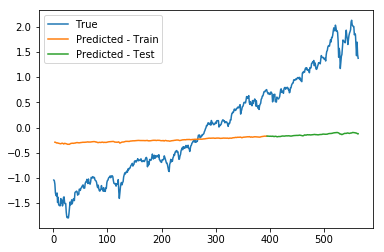

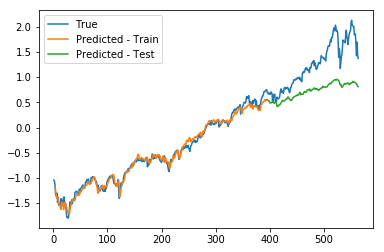

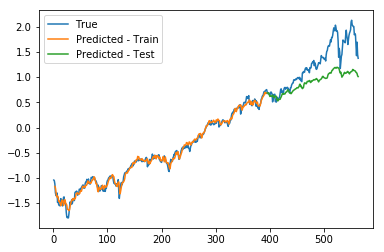

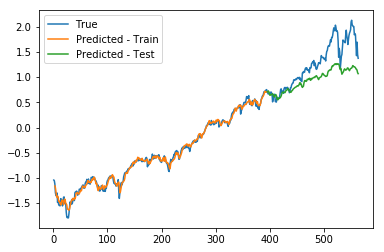

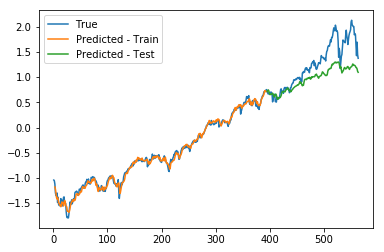

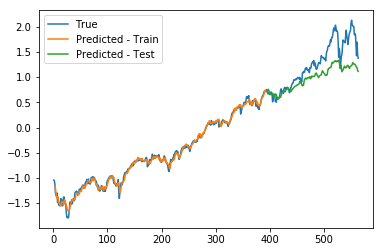

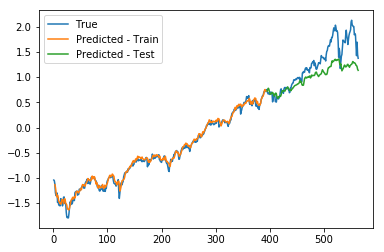

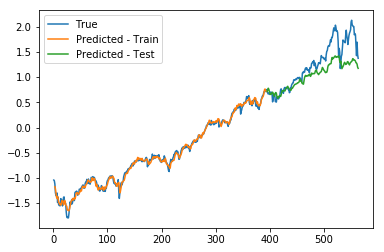

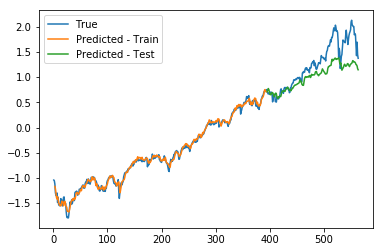

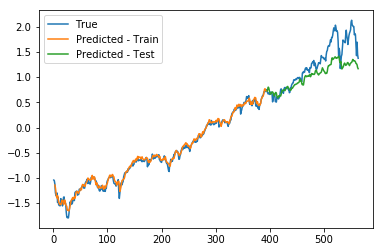

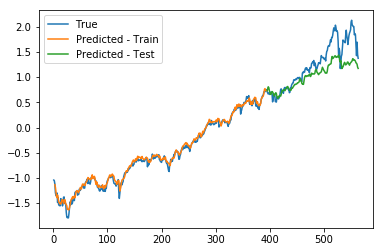

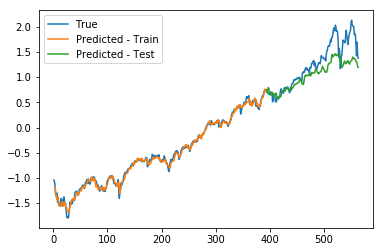

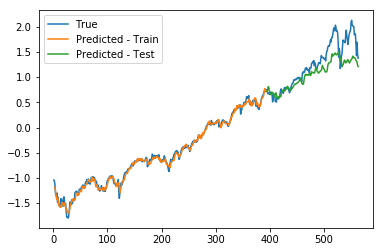

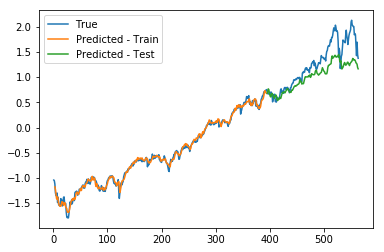

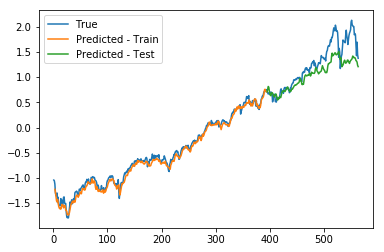

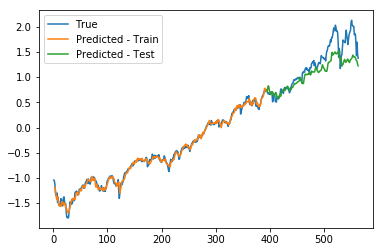

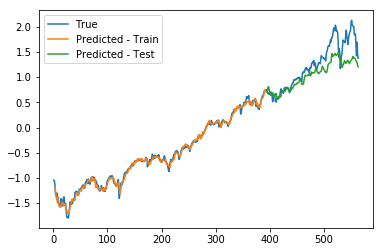

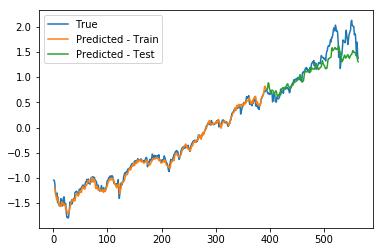

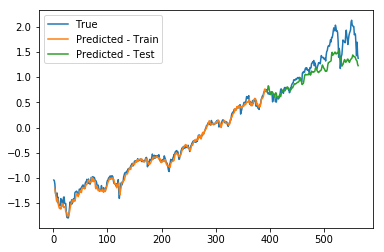

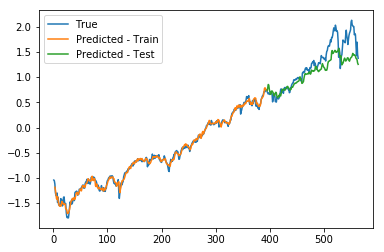

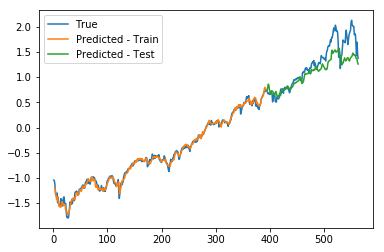

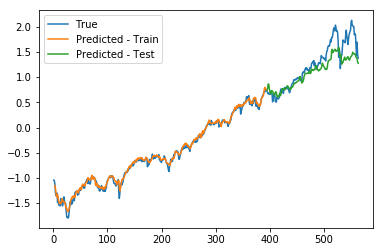

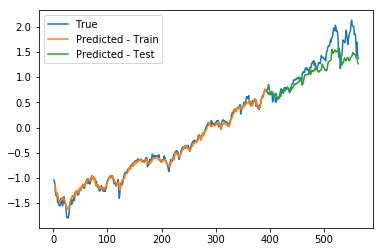

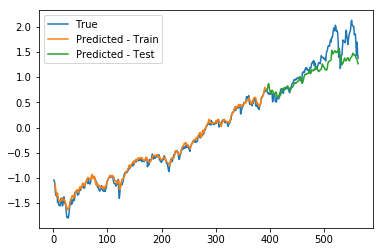

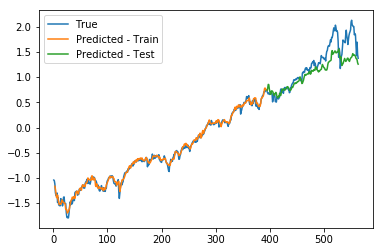

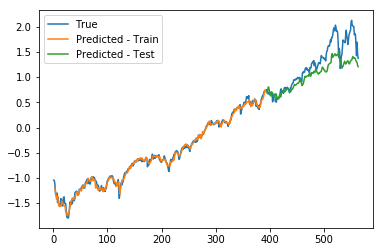

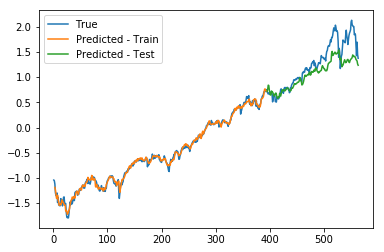

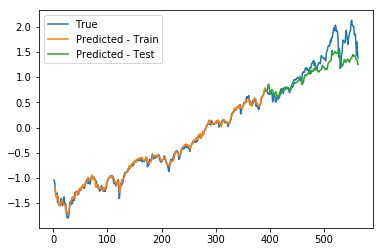

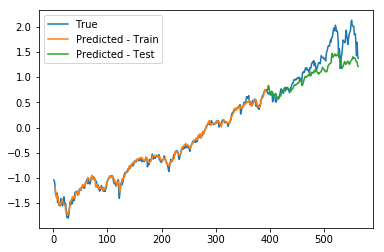

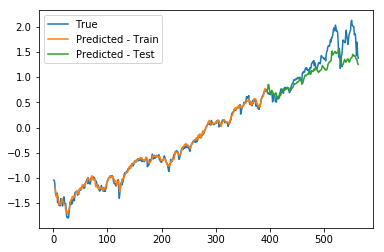

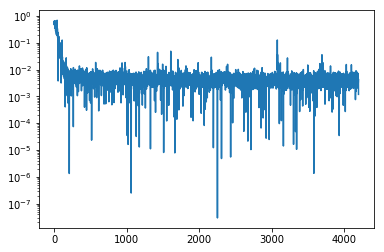

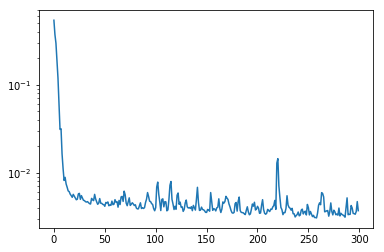

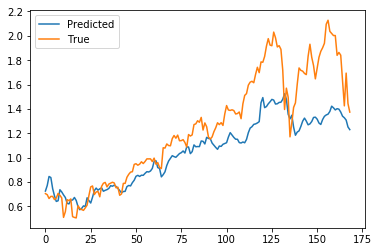

In [0]:
raw_data = prediction_df #pd.read_csv(os.path.join("data", "nasdaq100_padding.csv"), nrows=100 if debug else None)
logger.info(f"Shape of data: {raw_data.shape}.\nMissing in data: {raw_data.isnull().sum().sum()}.")
targ_cols = ("close_nasdaq",)
data, scaler = preprocess_data(raw_data, targ_cols)
#print(data)

da_rnn_kwargs = {"batch_size": 30, "T": 3}
config, model = da_rnn(data, n_targs=len(targ_cols), learning_rate=.001, **da_rnn_kwargs)
iter_loss, epoch_loss = train(model, data, config, n_epochs=300, save_plots=save_plots)
final_y_pred = predict(model, data, config.train_size, config.batch_size, config.T)

plt.figure()
plt.semilogy(range(len(iter_loss)), iter_loss)
utils.save_or_show_plot("iter_loss.png", save_plots)

plt.figure()
plt.semilogy(range(len(epoch_loss)), epoch_loss)
utils.save_or_show_plot("epoch_loss.png", save_plots)

plt.figure()
plt.plot(final_y_pred, label='Predicted')
plt.plot(data.targs[config.train_size:], label="True")
plt.legend(loc='upper left')
utils.save_or_show_plot("final_predicted.png", save_plots)

with open(os.path.join("data", "da_rnn_kwargs.json"), "w") as fi:
    json.dump(da_rnn_kwargs, fi, indent=4)

joblib.dump(scaler, os.path.join("data", "scaler.pkl"))
torch.save(model.encoder.state_dict(), os.path.join("data", "encoder.torch"))
torch.save(model.decoder.state_dict(), os.path.join("data", "decoder.torch"))

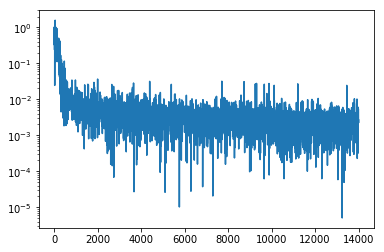

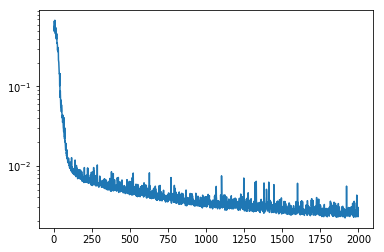

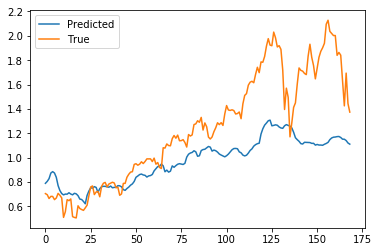

In [0]:
final_y_pred = predict(model, data, config.train_size, config.batch_size, config.T)

plt.figure()
plt.semilogy(range(len(iter_loss)), iter_loss)
utils.save_or_show_plot("iter_loss.png", save_plots)

plt.figure()
plt.semilogy(range(len(epoch_loss)), epoch_loss)
utils.save_or_show_plot("epoch_loss.png", save_plots)

plt.figure()
plt.plot(final_y_pred, label='Predicted')
plt.plot(data.targs[config.train_size:], label="True")
plt.legend(loc='upper left')
utils.save_or_show_plot("final_predicted.png", save_plots)

with open(os.path.join("data", "da_rnn_kwargs.json"), "w") as fi:
    json.dump(da_rnn_kwargs, fi, indent=4)

joblib.dump(scaler, os.path.join("data", "scaler.pkl"))
torch.save(model.encoder.state_dict(), os.path.join("data", "encoder.torch"))
torch.save(model.decoder.state_dict(), os.path.join("data", "decoder.torch"))